<a href="https://colab.research.google.com/github/FelipeRiveraBr/Granger-Causality-between-Illiquidity-and-Volatility-in-colombian-stock-market/blob/main/Iliquidity_and_volatility_in_colombian_markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Causalidad de Granger entre Iliquidez y Volatilidad en el mercado Colombiano**

## Exploración y preprocesamiento de los datos

In [ ]:
#Importar los paquetes necesarios
import pandas as pd #manipulación de datos
import numpy as np #cálculos matemáticos

In [ ]:
#Importar la base de datos utilizando el módulo pandas
dataAcciones=pd.read_excel('/content/drive/MyDrive/TESIS/Datos/Base de datos.xlsx',header=[0, 1],index_col=0)
dataAcciones #mostrar el dataframe

PFBCOLO CB Equity                                        \
Dates                PX_LAST PX_HIGH PX_LOW   VOLUME PX_BID PX_ASK   
2014-01-31             22220   22220  22000   209558  22100  22500   
2014-02-03             22100   22240  22100    87409  22000  22240   
2014-02-04             22300   22460  22120   340936  22000  22500   
2014-02-05             22220   22220  22000   192038  21700  22300   
2014-02-06             22700   22960  22000  1933964  22360  22800   
...                      ...     ...    ...      ...    ...    ...   
2024-01-25             30600   30900  30600   270440  30600  30760   
2024-01-26             30940   31100  30540   121667  30940  31000   
2024-01-29             31120   31160  30860   170553  31060  31120   
2024-01-30             31000   31320  31000   176483  30880  31000   
2024-01-31             31000   31040  30920    21535  31000  31020   

           ECOPETL CB Equity                           ... BVC CB Equity  \
Dates                PX_LAST PX_HIGH PX_LOW    VOLUME  ...        PX_LOW   
2014-01-31              3520    3520   3460  11257903  ...         10300   
2014-02-03              3480    3520   3480   3652399  ...         10300   
2014-02-04              3480    3500   3480   5363650  ...         10750   
2014-02-05              3560    3560   3480   5949788  ...         10750   
2014-02-06              3620    3655   3580  21444473  ...         10800   
...                      ...     ...    ...       ...  ...           ...   
2024-01-25              2355    2355   2300   8059422  ...         10360   
2024-01-26              2400    2400   2350   5063796  ...         10360   
2024-01-29              2395    2400   2345   3334508  ...         10800   
2024-01-30              2390    2400   2375   2041122  ...         10420   
2024-01-31              2380    2395   2375    254091  ...         10420   

                                 ETB CB Equity                                \
Dates       VOLUME PX_BID PX_ASK       PX_LAST PX_HIGH PX_LOW  VOLUME PX_BID   
2014-01-31  762423   9850  10850         420.0   420.0  400.0  149143  396.0   
2014-02-03  164405   9900  10850         420.0   420.0  400.0   12448  396.0   
2014-02-04   23997  10450  11000         420.0   420.0  400.0  124093  396.0   
2014-02-05     272  10450  10850         420.0   420.0  400.0   20922  396.0   
2014-02-06  370035  10300  11100         420.0   420.0  400.0   23201  396.0   
...            ...    ...    ...           ...     ...    ...     ...    ...   
2024-01-25       2  10120  11000         108.0   109.0  108.0  260288  108.0   
2024-01-26     797  10380  11100         108.0   109.0  108.0  124532  105.0   
2024-01-29    4274  10960  10980         108.0   109.0  108.0  189857  102.0   
2024-01-30    3418  10420  10800         108.0   109.0  108.0   56919  103.0   
2024-01-31       6  10520  10980         108.0   109.0  108.0   60000  108.0   

                   
Dates      PX_ASK  
2014-01-31  414.0  
2014-02-03  410.0  
2014-02-04  411.0  
2014-02-05  400.0  
2014-02-06  411.0  
...           ...  
2024-01-25  110.0  
2024-01-26  106.0  
2024-01-29  107.0  
2024-01-30  107.0  
2024-01-31  105.0  

[2609 rows x 150 columns]

In [ ]:
listaAcciones=list(dataAcciones.columns.get_level_values(0).unique()) #almacenar una lista de las acciones
listaAcciones #mostrar la lista de acciones

['PFBCOLO CB Equity',
 'ECOPETL CB Equity',
 'BCOLO CB Equity',
 'ISA CB Equity',
 'GEB CB Equity',
 'GRUPOARG CB Equity',
 'NUTRESA CB Equity',
 'CEMARGOS CB Equity',
 'PFAVAL CB Equity',
 'PFDAVVND CB Equity',
 'PFGRUPOA CB Equity',
 'PFGRUPSU CB Equity',
 'CORFICOL CB Equity',
 'CELSIA CB Equity',
 'GRUPOSUR CB Equity',
 'PFCEMARG CB Equity',
 'GRUPOBOL CB Equity',
 'BOGOTA CB Equity',
 'PROMIG CB Equity',
 'CNEC CB Equity',
 'TERPEL CB Equity',
 'PFCORCOL CB Equity',
 'MINEROS CB Equity',
 'BVC CB Equity',
 'ETB CB Equity']

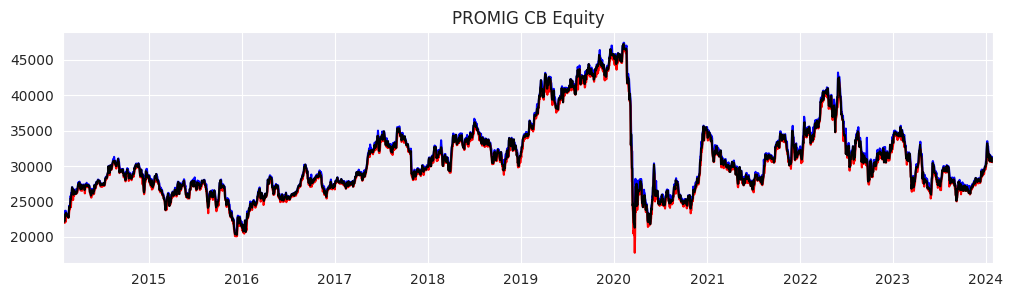

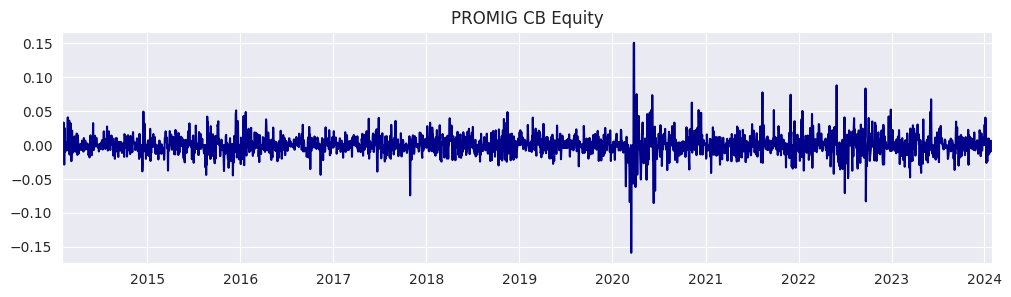

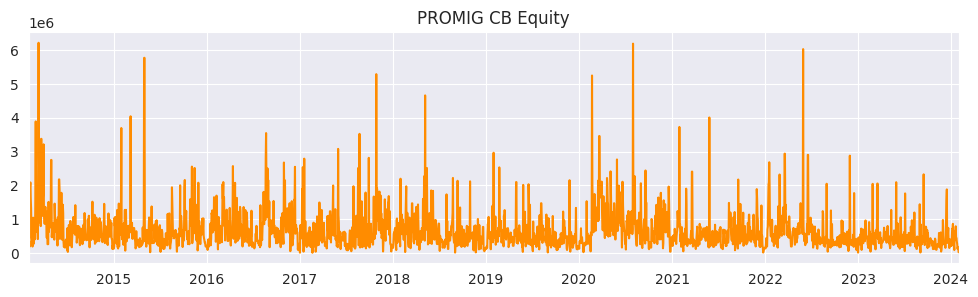

<Axes: title={'center': 'PROMIG CB Equity'}>

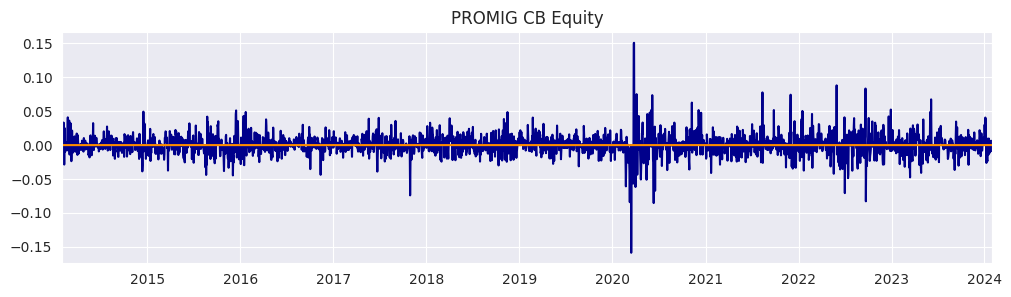

In [ ]:
from sklearn.preprocessing import MinMaxScaler #reescalar MinMax
import seaborn as sns
import matplotlib.pyplot as plt
accion='PFBCOLO CB Equity'
dataAcciones[accion]['PX_HIGH'].plot(figsize=(12,3),color='blue',title='PROMIG CB Equity')
dataAcciones[accion]['PX_LOW'].plot(figsize=(12,3),color='red',title='PROMIG CB Equity')
dataAcciones[accion]['PX_LAST'].plot(figsize=(12,3),color='black',title='PROMIG CB Equity')
plt.show()
# dataAcciones['PROMIG CB Equity']['VOLUME'].plot(figsize=(12,3),color='black',title='PROMIG CB Equity')
dataAcciones[accion]['PX_HIGH'].pct_change().plot(figsize=(12,3),color='darkblue',title='PROMIG CB Equity')
plt.show()
(dataAcciones[accion]['VOLUME']).plot(figsize=(12,3),color='darkorange',title='PROMIG CB Equity')
plt.show()
dataAcciones[accion]['PX_HIGH'].pct_change().plot(figsize=(12,3),color='darkblue',title='PROMIG CB Equity')
(1/dataAcciones[accion]['VOLUME']).plot(figsize=(12,3),color='darkorange',title='PROMIG CB Equity')
# scaler = MinMaxScaler()
# plastAcciones=dataAcciones.loc[:, (slice(None), 'PX_LAST')] #obtener un dataframe con los precios de cierre para graficarlos
# pd.DataFrame(scaler.fit_transform(plastAcciones), columns=plastAcciones.columns, index=plastAcciones.index).plot(figsize=(12,9),title='Acciones') #graficamos los precios reescalados